# 8. Adatvizualizáció
_2021.08.22_

Az órán ...

Tartalom:
- Matplotlib
- Seaborn
- Numpy

In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 8.1 Matplotlib
_Matplotlib egy Python adatmegjelenítő csomag és NumPy kiegészítés._<br/>
Telepítés: __pip install matplotlib__

### 8.1.1 Pont és vonaldiagram

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x_values = [1, 2, 3, 4, 5, 6]
y_values = [1, 4, 9, 16, 25, 36]

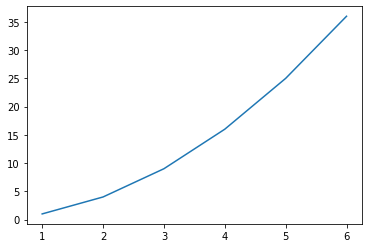

In [7]:
plt.plot(x_values, y_values)

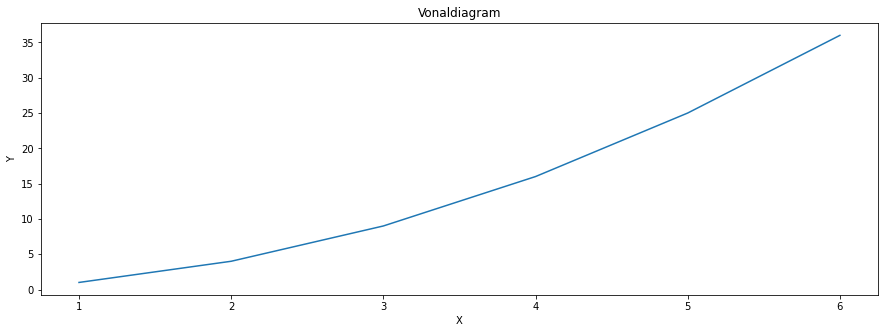

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(x_values, y_values)
plt.title('Vonaldiagram')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

_plot([x], y, [fmt], *, data=None, **kwargs)_<br/>
Az __fmt__ paraméter leírása [ezen](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) az oldalon a Notes szekció alatt érhető el.

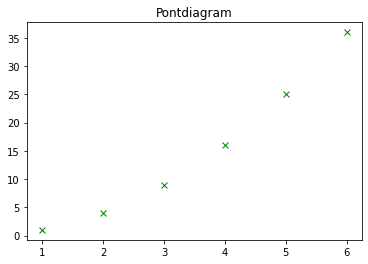

In [24]:
plt.plot(x_values, y_values, "gx")
plt.title('Pontdiagram')

plt.show()

> **1. feladat**: Készíts egy Pandas DataFrame-et, amiben eltárolod a számokat 1-20-ig. Számítsd ki a
> - négyzetét
> - szinuszát
>
> majd tárold el egy új oszlopban és jelenítsd meg Matplotlib segítségével!

In [79]:
pdf_main = pd.DataFrame(columns=['x', 'y1', 'y2'])

pdf_main['x'] = np.arange(1, 25)
pdf_main['y1'] = pdf_main['x']**2
pdf_main['y2'] = np.sin(pdf_main['x'])

In [81]:
pdf_main[:5]

,x,y1,y2
0,1,1,0.841471
1,2,4,0.909297
2,3,9,0.141120
3,4,16,-0.756802
4,5,25,-0.958924


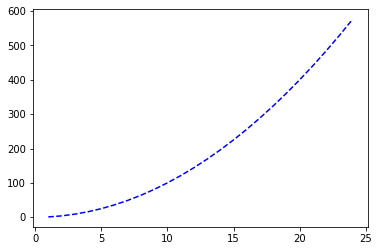

In [82]:
plt.plot(pdf_main['x'], pdf_main['y1'], "b--")

plt.show()

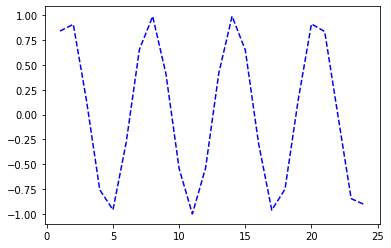

In [83]:
plt.plot(pdf_main['x'], pdf_main['y2'], "b--")

plt.show()

### 8.1.2 Subplot
[matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

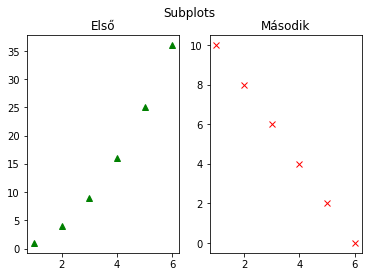

In [89]:
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, "g^")
plt.title("Első")

plt.subplot(1, 2, 2)
plt.plot(x_values, [10, 8, 6, 4, 2, 0], "rx")
plt.title("Második")

plt.suptitle("Subplots")
plt.show()

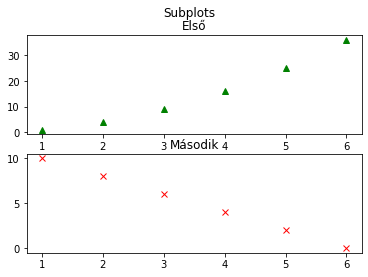

In [91]:
plt.subplot(2, 1, 1)
plt.plot(x_values, y_values, "g^")
plt.title("Első")

plt.subplot(2, 1, 2)
plt.plot(x_values, [10, 8, 6, 4, 2, 0], "rx")
plt.title("Második")

plt.suptitle("Subplots")
plt.show()

> **2. feladat**: Készíts egy 4x4-es ábrát, amelyben megjeleníted az alábbi vonaldiagramokat, ahol az x-tengelyen a számok 1-6-ig terjednek, az y-tengelyen, pedig
> - 1. ábra: x kétszerese
> - 2. ábra: x háromszorosa
> - 3. ábra: x + 2
> - 4. ábra: x + 3

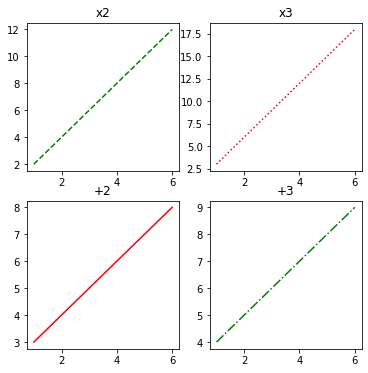

In [98]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax[0, 0].set_title("x2")
ax[0, 0].plot(x_values, [i * 2 for i in x_values], "g--")

ax[0, 1].set_title("x3")
ax[0, 1].plot(x_values, [i * 3 for i in x_values], "r:")

ax[1, 0].set_title("+2")
ax[1, 0].plot(x_values, [i + 2 for i in x_values], "r-")

ax[1, 1].set_title("+3")
ax[1, 1].plot(x_values, [i + 3 for i in x_values], "g-.")

plt.show()

### 8.1.3 Kördiagram

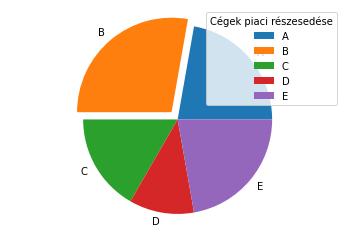

In [147]:
cegek = ['A', 'B', 'C', 'D', 'E']
reszesedes = [20, 25, 15, 10, 20]
explode = [0, 0.1, 0, 0, 0]

plt.pie(reszesedes, explode=explode, labels=cegek)
plt.axis('equal')
plt.legend(title='Cégek piaci részesedése')
plt.show()

### 8.1.4 Oszlopdiagram

In [108]:
x_values = ['A', 'B', 'C', 'D', 'E']
y_values = list(np.random.randint(51, 100, size=5))

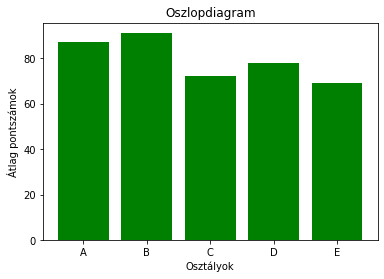

In [110]:
plt.bar(x_values, y_values, color="green")
plt.title("Oszlopdiagram")
plt.xlabel("Osztályok")
plt.ylabel("Átlag pontszámok")
plt.show()

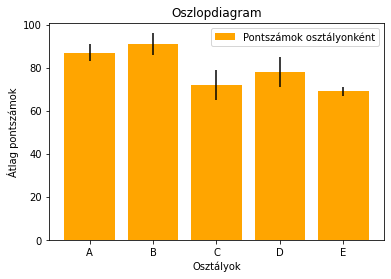

In [115]:
variance = [4, 5, 7, 7, 2]
plt.bar(x_values, y_values, yerr=variance, color="orange", label="Pontszámok osztályonként")
plt.title("Oszlopdiagram")
plt.xlabel("Osztályok")
plt.ylabel("Átlag pontszámok")
plt.legend(loc='best')
plt.show()

> **3. feladat**: A `8.3_feladat.csv`-ben található adatokból számítsd ki az átlag osztályzatokat, osztályonként és nemenként, majd jelenítsd meg az eredményeket egy oszlopdiagramon! Tüntesd fel az egyes oszlopokhoz tartozó szórást is!

In [131]:
pdf_main = pd.read_csv('8.3_feladat.csv', sep=';')
pdf_main_grouped = pdf_main[['osztaly', 'jegy', 'nem']].groupby(by=['osztaly', 'nem'], as_index=False).agg(jegy_mean=('jegy', 'mean'), jegy_std=('jegy', 'std'))

In [133]:
pdf_main_grouped

,osztaly,nem,jegy_mean,jegy_std
0,A,f,3.833333,1.169045
1,A,l,3.000000,1.154701
2,B,f,3.000000,1.414214
3,B,l,2.600000,1.816590
4,C,f,2.000000,1.154701
5,C,l,2.500000,1.732051
6,D,f,3.200000,1.303840
7,D,l,2.333333,1.527525


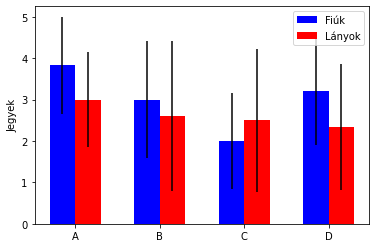

In [144]:
width = 0.3
plt.bar(np.arange(4), pdf_main_grouped[pdf_main_grouped['nem'] == 'f']['jegy_mean'], width, color="b", yerr=pdf_main_grouped[pdf_main_grouped['nem'] == 'f']['jegy_std'], label="Fiú")
plt.bar(np.arange(4)+width, pdf_main_grouped[pdf_main_grouped['nem'] == 'l']['jegy_mean'], width, color="r", yerr=pdf_main_grouped[pdf_main_grouped['nem'] == 'l']['jegy_std'], label="Lány")

plt.ylabel("Osztály")
plt.ylabel("Jegyek")
plt.xticks(np.arange(4)+width/2, pdf_main_grouped[pdf_main_grouped['nem'] == 'f']['osztaly'])

plt.legend(loc='best')
plt.show()

### 8.1.5 Hisztogram

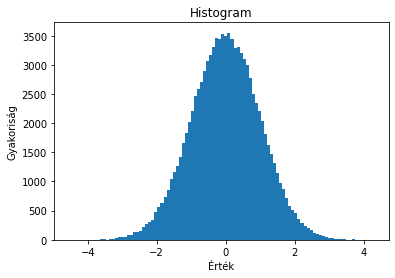

In [157]:
x = np.random.randn(100000)
plt.title("Histogram")
plt.xlabel("Érték")
plt.ylabel("Gyakoriság")
plt.hist(x, 100)
plt.show()

In [158]:
pdf_main = pd.read_csv('8.3_feladat.csv', sep=';')

<AxesSubplot:>

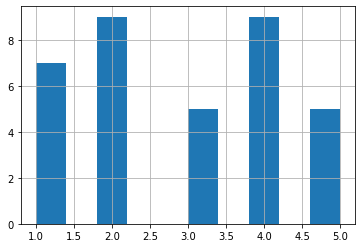

In [159]:
pdf_main['jegy'].hist()

## 8.2 Seaborn
_Matplotlib alapú vizualizációs csomag._<br/>
Telepítés: __pip install seaborn__

Examples: https://realpython.com/python-matplotlib-guide/
Numpy